In [8]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
from pycaret.regression import *
reg1 = setup(train, target = 'SalePrice', session_id = 1)

,Description,Value
0,session_id,1
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 403)"


In [3]:
top5 = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15306.6571,755928304.8333,26527.0072,0.8798,0.1202,0.0841,1.5420
gbr,Gradient Boosting Regressor,17552.5174,918792773.6891,29172.5778,0.8545,0.1369,0.0992,0.1120
lightgbm,Light Gradient Boosting Machine,17883.1014,938487734.0902,29828.8878,0.8482,0.1397,0.0999,0.1970
xgboost,Extreme Gradient Boosting,18506.0409,1027995155.6025,31062.2330,0.8341,0.1458,0.1041,0.2700
omp,Orthogonal Matching Pursuit,18689.3548,1454484274.3033,33955.4939,0.7379,0.1533,0.1064,0.2850
rf,Random Forest Regressor,18733.2303,1050846340.1799,31397.0495,0.8329,0.1500,0.1073,0.2540
ridge,Ridge Regression,19871.6289,1464456225.8888,35639.3928,0.7396,0.1677,0.1114,0.0220
lasso,Lasso Regression,20654.0564,1810456833.0225,37704.8469,0.6681,0.1900,0.1195,0.3010
en,Elastic Net,20812.3396,1610787672.8456,37900.7813,0.7193,0.1619,0.1179,0.0340
et,Extra Trees Regressor,22540.5423,1382786068.4201,36395.8627,0.7711,0.1756,0.1271,0.2900


In [18]:
catboost = create_model('catboost', verbose = False)
gbr = create_model('gbr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

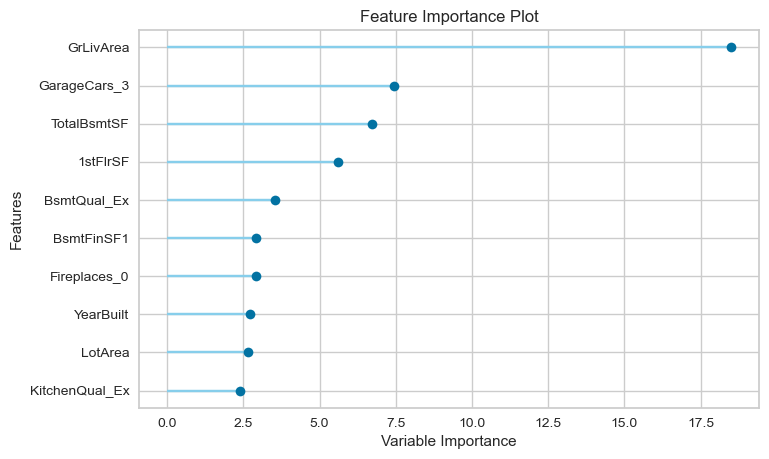

In [19]:
plot_model(catboost, plot = 'feature')

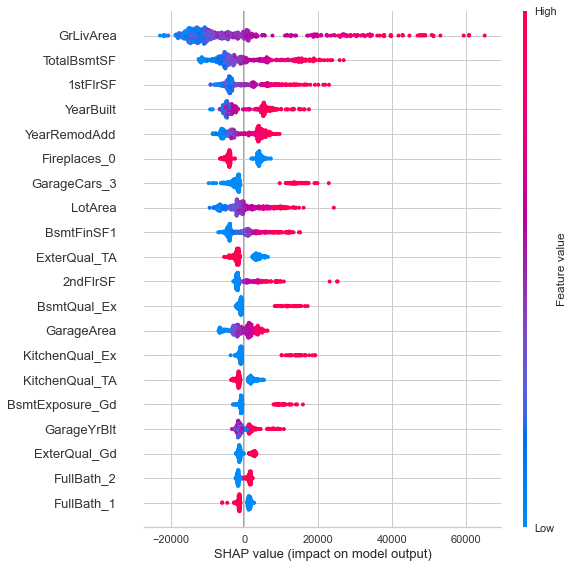

In [20]:
interpret_model(catboost)

In [4]:
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20026.8867,2527478453.2527,50274.0336,0.4542,0.1855,0.1266
1,20656.9933,879918401.7560,29663.4186,0.8447,0.1623,0.1214
2,18182.4204,855776701.9752,29253.6613,0.8216,0.1496,0.1030
3,19245.6689,1069668813.9239,32705.7917,0.8251,0.1476,0.1067
4,22720.9302,2030586896.2087,45062.0339,0.7627,0.1903,0.1334
5,23188.6864,1782004288.3847,42213.7926,0.7777,0.1505,0.1127
6,23736.7019,1166979772.3446,34161.0856,0.7740,0.1758,0.1400
7,20865.4226,971122103.3225,31162.8321,0.8130,0.1478,0.1096
8,18245.7468,631193427.9037,25123.5632,0.8629,0.1498,0.1123
9,22632.1623,1257761935.0743,35464.9395,0.8085,0.1971,0.1441


In [5]:
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13892.1923,733779640.0453,27088.3672,0.8415,0.1274,0.0854
1,16860.0124,638850996.0330,25275.5019,0.8873,0.1310,0.0968
2,14612.1154,559793024.7593,23659.9456,0.8833,0.1253,0.0864
3,16765.3377,738663936.9887,27178.3726,0.8792,0.1250,0.0904
4,19243.1730,1798587650.6892,42409.7589,0.7898,0.1634,0.1074
5,18670.6307,1758388498.8134,41933.1432,0.7806,0.1312,0.0873
6,16209.2173,635480628.9047,25208.7411,0.8769,0.1185,0.0910
7,15051.1811,524367358.0527,22899.0689,0.8990,0.1173,0.0828
8,13318.9855,357051288.7486,18895.8008,0.9224,0.1058,0.0780
9,16728.7646,829494198.6917,28800.9409,0.8737,0.1469,0.1037


In [6]:
final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=test)

In [14]:
sub = pd.read_csv('../data/sample_submission.csv')
sub['SalePrice'] = prediction['Label']
sub

,Id,SalePrice
0,1461,132796.100699
1,1462,161208.567558
2,1463,195532.004851
3,1464,192189.276828
4,1465,190431.304857
...,...,...
1454,2915,92945.069569
1455,2916,91371.085084
1456,2917,157448.681844
1457,2918,128672.495660


In [15]:
sub.to_csv( '../submit/baseline.csv', index=False)